## Setup

In [ ]:
# Clone the repo including pretrained models
!git clone https://github.com/as-ideas/ForwardTacotron.git

Cloning into 'ForwardTacotron'...
remote: Enumerating objects: 5399, done.
remote: Counting objects: 100% (1770/1770), done.
remote: Compressing objects: 100% (698/698), done.
remote: Total 5399 (delta 1283), reused 1470 (delta 1067), pack-reused 3629
Receiving objects: 100% (5399/5399), 205.54 MiB | 18.17 MiB/s, done.
Resolving deltas: 100% (3693/3693), done.


In [ ]:
# Install requirements
%cd ForwardTacotron/  
!apt-get install espeak
!pip install -r requirements.txt

/content/ForwardTacotron
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,219 kB of archives.
After this operation, 3,031 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsonic0 amd64 0.2.0-6 [13.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 espeak-data amd64 1.48.04+dfsg-5 [934 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libespeak1 amd64 1.48.04+dfsg-5 [145 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd64 espeak amd64 1.48.04+dfsg-5 [61.6 kB]
Fetched 1,21

In [ ]:
# Get pretrained models
!wget https://public-asai-dl-models.s3.eu-central-1.amazonaws.com/ForwardTacotron/forward_step90k.pt
!wget https://public-asai-dl-models.s3.eu-central-1.amazonaws.com/ForwardTacotron/fastpitch_step200k.pt
!wget https://public-asai-dl-models.s3.eu-central-1.amazonaws.com/ForwardTacotron/wave_step575k.pt

--2021-10-20 18:32:53--  https://public-asai-dl-models.s3.eu-central-1.amazonaws.com/ForwardTacotron/forward_step90k.pt
Resolving public-asai-dl-models.s3.eu-central-1.amazonaws.com (public-asai-dl-models.s3.eu-central-1.amazonaws.com)... 52.219.171.26
Connecting to public-asai-dl-models.s3.eu-central-1.amazonaws.com (public-asai-dl-models.s3.eu-central-1.amazonaws.com)|52.219.171.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 292356811 (279M) [application/x-www-form-urlencoded]
Saving to: ‘forward_step90k.pt’

forward_step90k.pt  100%[===================>] 278.81M  87.2MB/s    in 3.2s    

2021-10-20 18:32:56 (87.2 MB/s) - ‘forward_step90k.pt’ saved [292356811/292356811]

--2021-10-20 18:32:56--  https://public-asai-dl-models.s3.eu-central-1.amazonaws.com/ForwardTacotron/fastpitch_step200k.pt
Resolving public-asai-dl-models.s3.eu-central-1.amazonaws.com (public-asai-dl-models.s3.eu-central-1.amazonaws.com)... 52.219.171.26
Connecting to public-asai-dl-mod

In [ ]:
# Load pretrained models
from notebook_utils.synthesize import Synthesizer
import IPython.display as ipd
synth_forward = Synthesizer(tts_path='forward_step90k.pt', voc_path='wave_step575k.pt')
synth_fastpitch = Synthesizer(tts_path='fastpitch_step200k.pt', voc_path='wave_step575k.pt')

/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Downloading: "https://github.com/seungwonpark/melgan/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/seungwonpark/melgan/releases/download/v0.3-alpha/nvidia_tacotron2_LJ11_epoch6400

  0%|          | 0.00/16.3M [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/seungwonpark_melgan_master


##Synthesize

In [ ]:
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev
from IPython.display import HTML, clear_output

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop
  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common
  libcairo-script-interpreter2 libcairo2-dev libcupsfilters1 libcupsimage2
  libdjvulibre-dev libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 liblcms2-dev libleptonica-dev
  liblqr-1-0 liblqr-1-0-dev libmagickcore-6-arch-config
  libmagickcore-6-headers libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickcore-6.q16-dev libmagickwand-6-headers libmagickwand-6.q16-3
  libmagickwand-6.q16-dev libpixman-1-dev librsvg2-dev libwmf-dev libwmf0.2-7
  libxcb-shm0-dev poppler-data tesseract-ocr-eng tesseract-ocr-osd
Suggested packages:
  fonts-noto ghostscript-x libcairo2-doc inkscape libjxr-tools librsvg2-doc
  libwmf-doc libwmf0.2-7-gtk poppler-utils

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
! pip install pytesseract wand opencv-python
import pytesseract
from pytesseract import Output

     |████████████████████████████████| 139 kB 11.5 MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=92b4a3061c3adf797447f8b3019ea96d3a552c039d79ac0a9cad74e16572a87f
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


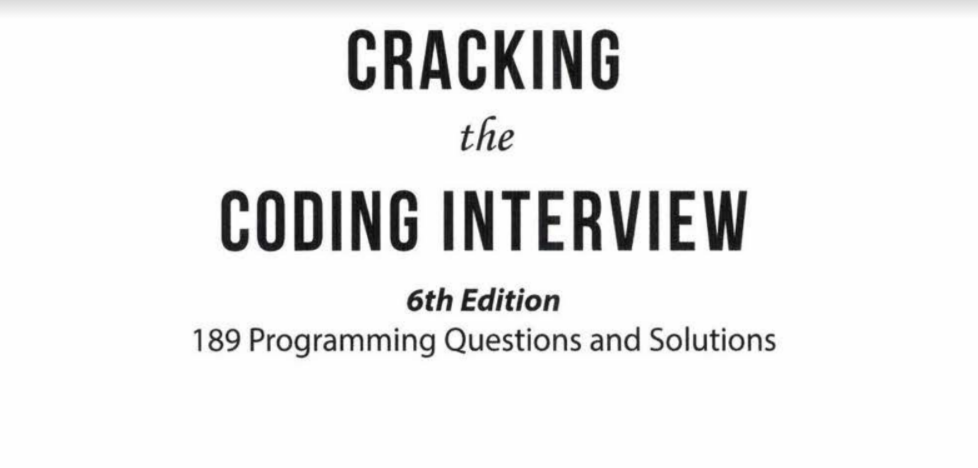

In [ ]:
img = cv2.imread('n2.png')
cv2_imshow(img)

In [ ]:
try:
  text=pytesseract.image_to_string(img)
  characters_to_remove = "!()@—*“>+-/,'|£#%$&^_~."
  new_string = text
  for character in characters_to_remove:
    new_string = new_string.replace(character, "")
  print(new_string)
except IOError as e:
    print("Error (%s)." % e)

CRACKING

the

CODING INTERVIEW

6th Edition
189 Programming Questions and Solutions



In [ ]:
# Synthesize with wavernn (alpha=1.0)
wav = synth_fastpitch(new_string, voc_model='wavernn', alpha=1)
ipd.Audio(wav, rate=synth_fastpitch.dsp.sample_rate)



| ████████████████ 144000/145200 | Batch Size: 12 | Gen Rate: 3.4kHz | 

In [ ]:
# Synthesize faster (alpha=1.2)
wav = synth_fastpitch(new_string, voc_model='melgan', alpha=1.2)
ipd.Audio(wav, rate=synth_fastpitch.dsp.sample_rate)


In [ ]:

# Synthesize with forward_tacotron and melgan (alpha=1.0)

wav = synth_forward(new_string, voc_model='melgan', alpha=0.8)
ipd.Audio(wav, rate=synth_forward.dsp.sample_rate)

In [ ]:
# Synthesize with fast_pitch and melgan (alpha=1.0)
wav = synth_fastpitch(new_string, voc_model='melgan', alpha=0.8)
ipd.Audio(wav, rate=synth_fastpitch.dsp.sample_rate)


In [ ]:
# Synthesize with forward_tacotron and melgan (alpha=1.0)
wav = synth_forward(t, voc_model='melgan', alpha=0.8)
ipd.Audio(wav, rate=synth_forward.dsp.sample_rate)


In [ ]:
# Synthesize with amplified pitch
pitch_func = lambda x: x * 1.5
wav = synth_fastpitch(new_string, voc_model='melgan', alpha=1, pitch_function=pitch_func)
ipd.Audio(wav, rate=synth_fastpitch.dsp.sample_rate)